# 分类问题的评估方法

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = 1 - data.target
# 反转标签的0和1

X = X[:, :10]
from sklearn.linear_model import LogisticRegression
model_lor = LogisticRegression()
model_lor.fit(X, y)
y_pred = model_lor.predict(X)

## 混淆矩阵

In [2]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[337  20]
 [ 30 182]]


## 正确率

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9121265377855887

## 精确率

In [4]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.900990099009901

## 召回率

In [5]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8584905660377359

## F值

In [6]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

## 预测概率

In [7]:
model_lor.predict_proba(X)

array([[7.69543428e-03, 9.92304566e-01],
       [2.03561990e-02, 9.79643801e-01],
       [2.34733703e-03, 9.97652663e-01],
       ...,
       [2.34686021e-02, 9.76531398e-01],
       [8.11350734e-06, 9.99991886e-01],
       [9.99573328e-01, 4.26671727e-04]])

In [8]:
import numpy as np
y_pred2 = (model_lor.predict_proba(X)[:, 1]>0.1).astype(np.int)
print(confusion_matrix(y, y_pred2))

[[267  90]
 [  6 206]]


In [9]:
print(accuracy_score(y, y_pred2))
print(recall_score(y, y_pred2))

0.8312829525483304
0.9716981132075472


## ROC曲线与AUC

In [10]:
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

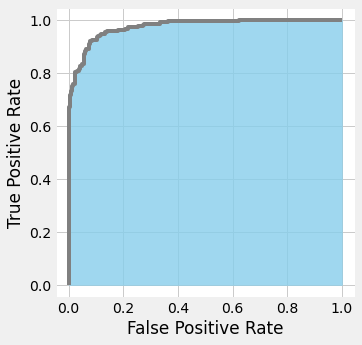

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5)

ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()

In [12]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, probas[:, 1])

0.9741557000158554

# 回归问题的评估方法

In [13]:
from sklearn.datasets import load_boston
data = load_boston()
X = data.data[:, [5,]]
y = data.target

In [14]:
from sklearn.linear_model import LinearRegression
model_lir = LinearRegression()
model_lir.fit(X, y)
y_pred = model_lir.predict(X)

In [15]:
print(model_lir.coef_)
print(model_lir.intercept_)

[9.10210898]
-34.67062077643857


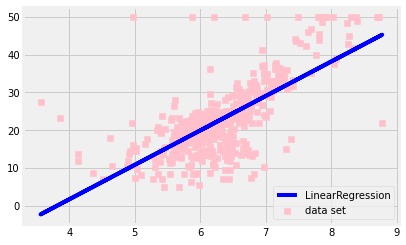

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X, y, color='pink', marker='s', label='data set')
ax.plot(X, y_pred, color='blue', label='LinearRegression')
ax.legend()
plt.show()

## 均方误差

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

43.60055177116956

## 决定系数

In [18]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.48352545599133423

# 与其他算法进行比较

In [19]:
from sklearn.svm import SVR
model_svr_linear = SVR(C=0.01, kernel='linear')
model_svr_linear.fit(X, y)
y_svr_pred = model_svr_linear.predict(X)

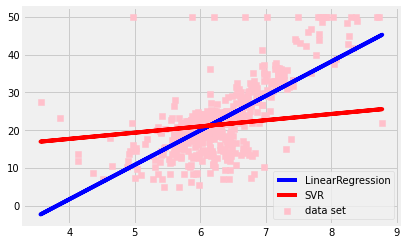

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X, y, color='pink', marker='s', label='data set')
ax.plot(X, y_pred, color='blue', label='LinearRegression')
ax.plot(X, y_svr_pred, color='red', label='SVR')
ax.legend()
plt.show()

In [21]:
print(mean_squared_error(y, y_svr_pred)) # 均方误差 
print(r2_score(y, y_svr_pred)) # 决定系数
print(model_svr_linear.coef_) # 斜率
print(model_svr_linear.intercept_) # 截距

72.14197118147209
0.14543531775956597
[[1.64398]]
[11.13520958]


# 超参数的设置

In [22]:
model_svr_rbf = SVR(C=1.0, kernel='rbf')
model_svr_rbf.fit(X, y)
y_svr_pred = model_svr_rbf.predict(X) 
print(mean_squared_error(y, y_svr_pred)) # 均方误差
print(r2_score(y, y_svr_pred)) # 决定系数

37.40032481992347
0.5569708427424378


In [23]:
train_X, test_X = X[:400], X[400:]
train_y, test_y = y[:400], y[400:]
model_svr_rbf_1 = SVR(C=1.0, kernel='rbf')
model_svr_rbf_1.fit(train_X, train_y)
test_y_pred = model_svr_rbf_1.predict(test_X) 
print(mean_squared_error(test_y, test_y_pred)) # 均方误差
print(r2_score(test_y, test_y_pred)) # 决定系数

69.32813164021485
-1.4534559402985217


# 将数据分为训练数据和验证数据

In [24]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_train_pred = model_svc.predict(X_train)
y_test_pred = model_svc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9120603015075377
0.9064327485380117


In [26]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_train_pred = model_rfc.predict(X_train)
y_test_pred = model_rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

1.0
0.9298245614035088


# 交叉验证（cross validation）

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True)
model_rfc_1 = RandomForestClassifier()
cross_val_score(model_rfc_1, X, y, cv=cv, scoring='accuracy')

array([0.95614035, 0.96491228, 0.93859649, 0.95614035, 0.99115044])

In [28]:
cross_val_score(model_rfc_1, X, y, cv=cv, scoring="f1")

array([0.97183099, 0.96240602, 0.98611111, 0.97101449, 0.94267516])

# 搜索超参数

In [29]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = 1 - data.target # 反转标签的0和1
X = X[:, :10]

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True)
param_grid = {'max_depth': [5, 10, 15], 'n_estimators': [10, 20, 30]}
model_rfc_2 = RandomForestClassifier()
grid_search = GridSearchCV(model_rfc_2, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [31]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9384878124514827
{'max_depth': 15, 'n_estimators': 30}


In [32]:
grid_search = GridSearchCV(model_rfc_2, param_grid, cv=cv, scoring='f1')